In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
gdsc=pd.read_excel('/content/GDSC1_fitted_dose_response_27Oct23.xlsx')

In [ ]:
gdsc.head()

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,342,15580432,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.966813,0.985678,0.026081,1.299144
1,GDSC1,342,15580806,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692090,0.972690,0.110059,0.156076
2,GDSC1,342,15581198,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.477990,0.944459,0.087019,-0.035912
3,GDSC1,342,15581542,684072,SK-ES-1,SIDM01111,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.033564,0.950758,0.016290,-0.434437
4,GDSC1,342,15581930,687448,COLO-829,SIDM00909,SKCM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.966007,0.954778,0.180255,0.401702


In [ ]:
gdsc['DATASET'].unique()

array(['GDSC1'], dtype=object)

**STEP 1: Copy the dataset to perform necessary operations**

In [ ]:
df=gdsc.copy()
df.head()

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,342,15580432,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.966813,0.985678,0.026081,1.299144
1,GDSC1,342,15580806,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692090,0.972690,0.110059,0.156076
2,GDSC1,342,15581198,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.477990,0.944459,0.087019,-0.035912
3,GDSC1,342,15581542,684072,SK-ES-1,SIDM01111,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.033564,0.950758,0.016290,-0.434437
4,GDSC1,342,15581930,687448,COLO-829,SIDM00909,SKCM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.966007,0.954778,0.180255,0.401702


In [ ]:
df.shape

(333161, 19)

**Step 2: Remove columns which will not be of use in training the model**

In [ ]:
print(df['DATASET'].unique())
print(df['NLME_RESULT_ID'].unique())

['GDSC1']
[342]


In [ ]:
df.drop('DATASET',axis=1,inplace=True)

In [ ]:
df.drop('NLME_RESULT_ID',axis=1,inplace=True)

In [ ]:
df.shape

(333161, 17)

In [ ]:
df.columns

Index(['NLME_CURVE_ID', 'COSMIC_ID', 'CELL_LINE_NAME', 'SANGER_MODEL_ID',
       'TCGA_DESC', 'DRUG_ID', 'DRUG_NAME', 'PUTATIVE_TARGET', 'PATHWAY_NAME',
       'COMPANY_ID', 'WEBRELEASE', 'MIN_CONC', 'MAX_CONC', 'LN_IC50', 'AUC',
       'RMSE', 'Z_SCORE'],
      dtype='object')

In [ ]:
df.head()

,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,15580432,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.966813,0.985678,0.026081,1.299144
1,15580806,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692090,0.972690,0.110059,0.156076
2,15581198,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.477990,0.944459,0.087019,-0.035912
3,15581542,684072,SK-ES-1,SIDM01111,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.033564,0.950758,0.016290,-0.434437
4,15581930,687448,COLO-829,SIDM00909,SKCM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.966007,0.954778,0.180255,0.401702


**Step 3: Treat missing values**

In [ ]:
df.isnull().sum()

,0
NLME_CURVE_ID,0
COSMIC_ID,0
CELL_LINE_NAME,0
SANGER_MODEL_ID,0
TCGA_DESC,580
DRUG_ID,0
DRUG_NAME,0
PUTATIVE_TARGET,3652
PATHWAY_NAME,0
COMPANY_ID,0


In [ ]:
(df['PUTATIVE_TARGET'].isnull().sum())*100/df.shape[0]

np.float64(1.096166718193306)

In [ ]:
df['PUTATIVE_TARGET'].head()

,PUTATIVE_TARGET
0,EGFR
1,EGFR
2,EGFR
3,EGFR
4,EGFR


In [ ]:
df['PUTATIVE_TARGET'].fillna(df['PUTATIVE_TARGET'].mode().iloc[0],inplace=True)

In [ ]:
df['PUTATIVE_TARGET'].isnull().sum()

np.int64(0)

In [ ]:
df['TCGA_DESC'].unique()

array(['UNCLASSIFIED', 'SKCM', 'GBM', 'LUAD', 'SCLC', 'NB', 'ESCA',
       'BRCA', 'HNSC', 'LAML', 'BLCA', 'KIRC', 'MM', 'PAAD', 'LCML',
       'LUSC', 'ALL', 'COREAD', 'LGG', 'OV', 'DLBC', 'MB', 'CLL', 'STAD',
       'MESO', 'PRAD', nan, 'THCA', 'UCEC', 'CESC', 'LIHC', 'ACC'],
      dtype=object)

In [ ]:
df['TCGA_DESC'].fillna(df['TCGA_DESC'].mode().iloc[0],inplace=True)

In [ ]:
df['TCGA_DESC'].isnull().sum()

np.int64(0)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

# EDA

**Step 4:STRUCTURE OF DATASET**

In [ ]:
df.describe()

,NLME_CURVE_ID,COSMIC_ID,DRUG_ID,COMPANY_ID,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
count,3.331610e+05,3.331610e+05,333161.000000,333161.000000,333161.000000,333161.000000,333161.000000,333161.000000,333161.000000,3.331610e+05
mean,1.574640e+07,9.862543e+05,724.246223,1034.074811,0.145992,37.669829,2.072253,0.834389,0.085871,5.823010e-10
std,9.621394e+04,2.156635e+05,504.337777,17.333121,1.206658,308.877466,2.592704,0.193911,0.054749,9.993980e-01
min,1.557976e+07,6.836670e+05,1.000000,1001.000000,0.000031,0.008000,-10.577744,0.005996,0.001482,-1.006981e+01
25%,1.566308e+07,9.067980e+05,260.000000,1019.000000,0.010000,2.560000,0.692894,0.767623,0.041263,-6.351450e-01
50%,1.574640e+07,9.097130e+05,474.000000,1045.000000,0.039063,10.000000,2.474976,0.916610,0.072694,2.469400e-02
75%,1.582973e+07,1.240138e+06,1197.000000,1045.000000,0.040000,16.000000,3.936266,0.973122,0.117606,6.659890e-01
max,1.591305e+07,1.789883e+06,1531.000000,1046.000000,15.625000,4000.000000,12.354552,0.999552,0.299965,5.660199e+00


**Key findings**

*   Concentration has wide range from 0.000031 to 15.625000 for MIN_CONC and 37.669829 to 4000 . Some drugs are tested at low concentration while other at very high concentration.
*   Huge standard deviation (308.88) in MAX_CONC: Suggests right-skewed distribution—some drugs have very high doses.

*   Mean of LN-IC50 is 2.07 indicating most drugs are moderate
*   LN-IC50 may be skewed indicating there are few resistant drugs

*   Max value of RMSE is 0.2999 idicating some models have high prediction errors
*   High range of Z_SCORE indicates presence of outliers




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333161 entries, 0 to 333160
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NLME_CURVE_ID    333161 non-null  int64  
 1   COSMIC_ID        333161 non-null  int64  
 2   CELL_LINE_NAME   333161 non-null  object 
 3   SANGER_MODEL_ID  333161 non-null  object 
 4   TCGA_DESC        333161 non-null  object 
 5   DRUG_ID          333161 non-null  int64  
 6   DRUG_NAME        333161 non-null  object 
 7   PUTATIVE_TARGET  333161 non-null  object 
 8   PATHWAY_NAME     333161 non-null  object 
 9   COMPANY_ID       333161 non-null  int64  
 10  WEBRELEASE       333161 non-null  object 
 11  MIN_CONC         333161 non-null  float64
 12  MAX_CONC         333161 non-null  float64
 13  LN_IC50          333161 non-null  float64
 14  AUC              333161 non-null  float64
 15  RMSE             333161 non-null  float64
 16  Z_SCORE          333161 non-null  floa

**STEP 5:SKEWNESS ANALYSIS**

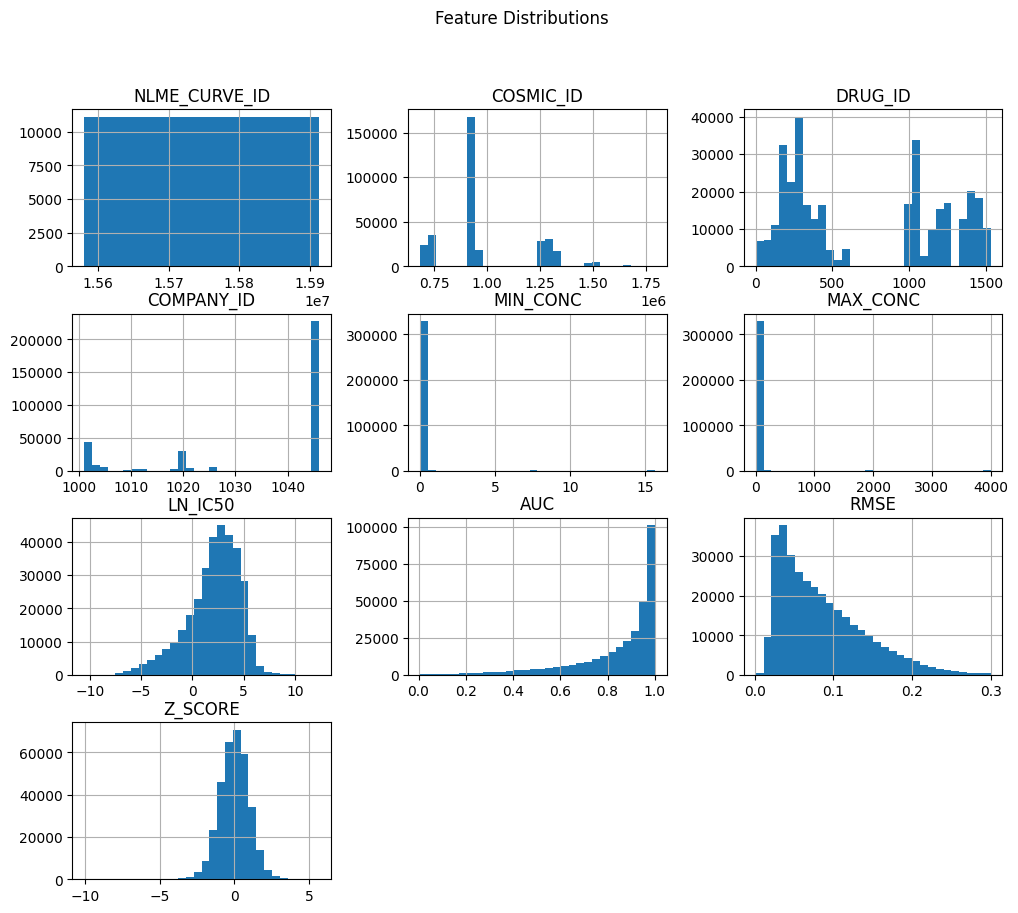

In [ ]:
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

**STEP 5:OUTLIER ANALYSIS**

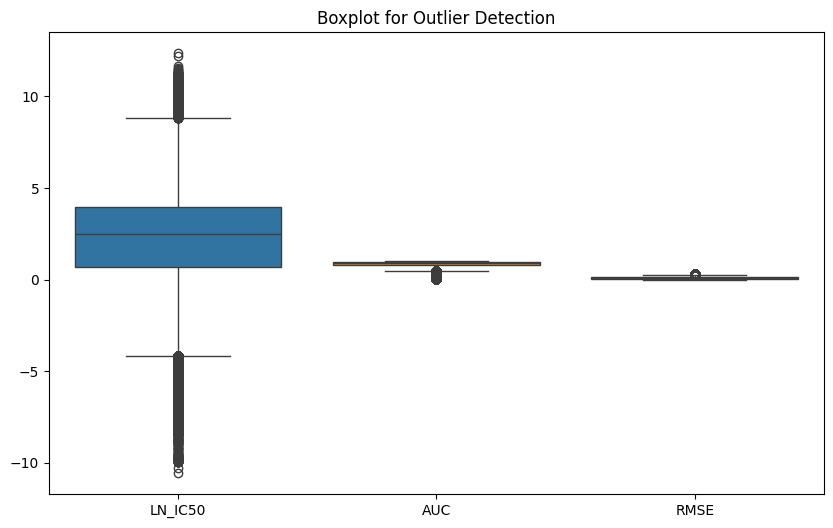

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['LN_IC50', 'AUC', 'RMSE']])
plt.title("Boxplot for Outlier Detection")
plt.show()

In [ ]:
LN_IC50_Q1 = df['LN_IC50'].quantile(0.25)
LN_IC50_Q3 = df['LN_IC50'].quantile(0.75)
LN_IC50_IQR = LN_IC50_Q3 - LN_IC50_Q1


outliers_IQR = df[(df['LN_IC50'] < LN_IC50_Q1 - 1.5 * LN_IC50_IQR) | (df['LN_IC50'] > LN_IC50_Q3 + 1.5 * LN_IC50_IQR)]
print("Outliers based on IQR:", len(outliers_IQR))


Outliers based on IQR: 9178


In [ ]:
AUC_Q1=df['AUC'].quantile(0.25)
AUC_Q3=df['AUC'].quantile(0.75)
AUC_IQR=AUC_Q3-AUC_Q1

outliers_IQR=df[(df['AUC']<AUC_Q1-1.5*AUC_IQR)|(df['AUC']>AUC_Q3+1.5*AUC_IQR)]
print("Outliers based on IQR:",len(outliers_IQR))

Outliers based on IQR: 22374


**Key Findings**

*   Presence of 9178 outliers in LN_IC50
*   There are 22374 outliers in AUC



# FEATURE ENGINEERING


**STEP 6:HANDLE SKEWNESS**

In [ ]:
df['RMSE_log'] = np.log1p(df['RMSE'])

<Axes: >

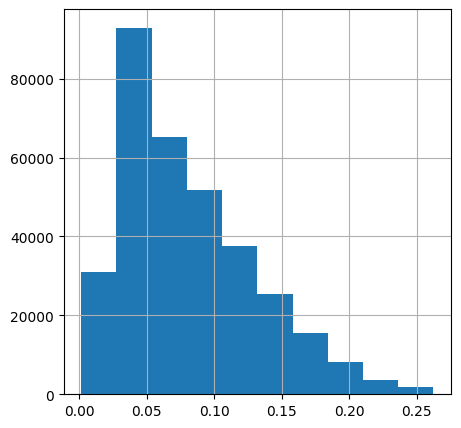

In [ ]:
df['RMSE_log'].hist(figsize=(5,5))

In [ ]:
df['LNIC_50_cbrt'] = np.cbrt(df['LN_IC50'])

<Axes: >

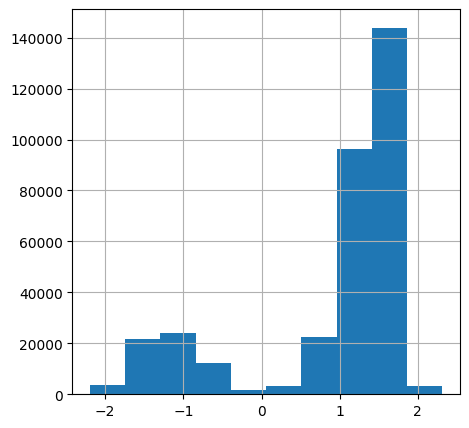

In [ ]:
df['LNIC_50_cbrt'].hist(figsize=(5,5))

In [ ]:
df['AUC_cbrt']=np.cbrt(df['AUC'])

<Axes: >

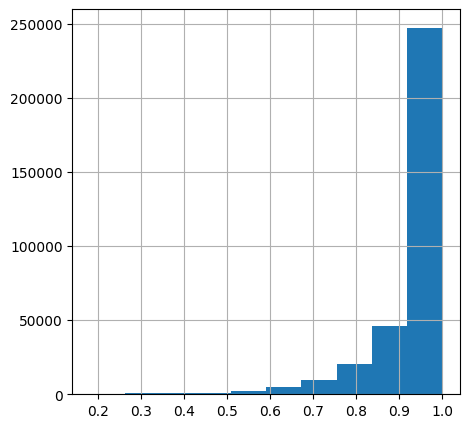

In [ ]:
df['AUC_cbrt'].hist(figsize=(5,5))

**STEP 7-WINSORIZATION OF OUTLIERS**

<Axes: >

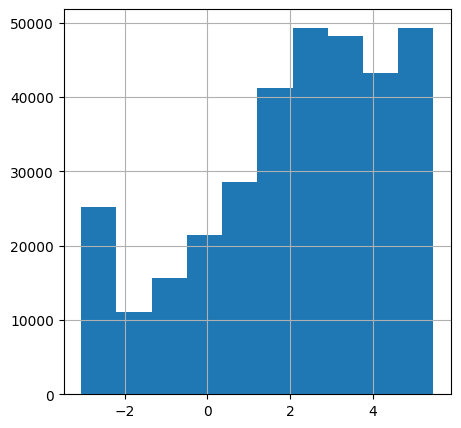

In [ ]:
from scipy.stats.mstats import winsorize

df['LN_IC50_winsorized'] = winsorize(df['LN_IC50'], limits=[0.05, 0.05])
df['LN_IC50_winsorized'].hist(figsize=(5,5))

<Axes: >

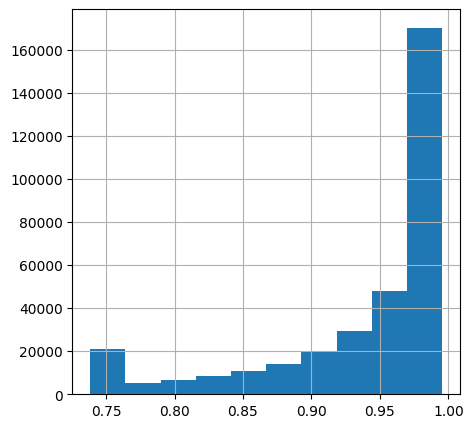

In [ ]:
df['AUC_winsorized'] = winsorize(df['AUC_cbrt'], limits=[0.05, 0.05])
df['AUC_winsorized'].hist(figsize=(5,5))

**STEP 8:Process columns of Object type**

In [ ]:
print(df.select_dtypes(include=['object']).columns)

Index(['CELL_LINE_NAME', 'SANGER_MODEL_ID', 'TCGA_DESC', 'DRUG_NAME',
       'PUTATIVE_TARGET', 'PATHWAY_NAME', 'WEBRELEASE'],
      dtype='object')


In [ ]:
#Different cancer types
df['TCGA_DESC'].unique()

array(['UNCLASSIFIED', 'SKCM', 'GBM', 'LUAD', 'SCLC', 'NB', 'ESCA',
       'BRCA', 'HNSC', 'LAML', 'BLCA', 'KIRC', 'MM', 'PAAD', 'LCML',
       'LUSC', 'ALL', 'COREAD', 'LGG', 'OV', 'DLBC', 'MB', 'CLL', 'STAD',
       'MESO', 'PRAD', 'THCA', 'UCEC', 'CESC', 'LIHC', 'ACC'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['TCGA_DESC_encoded'] = le.fit_transform(df['TCGA_DESC'])


In [ ]:
df['TCGA_DESC_encoded'].unique()

array([30, 26,  9, 16, 25, 21,  8,  3, 10, 12,  2, 11, 20, 23, 13, 17,  1,
        6, 14, 22,  7, 18,  5, 27, 19, 24, 28, 29,  4, 15,  0])

In [ ]:
df['SANGER_MODEL_ID'].head()

,SANGER_MODEL_ID
0,SIDM00263
1,SIDM00269
2,SIDM00203
3,SIDM01111
4,SIDM00909


In [ ]:
freq_encoding = df['SANGER_MODEL_ID'].value_counts().to_dict()
df['SANGER_encoded'] = df['SANGER_MODEL_ID'].map(freq_encoding)


In [ ]:
df['SANGER_encoded'].unique()

array([374, 392, 344, 388, 377, 394, 385, 386, 397, 358, 387, 170, 384,
       395, 218, 310, 393, 288, 379, 389, 390, 382, 396, 261, 357, 368,
       336, 301, 367, 391, 331, 365,  41, 378, 402, 398, 381, 361, 181,
       383,  32, 295, 380, 287, 244, 376, 263, 366, 343, 350, 219, 364,
       216, 164, 215, 269, 375, 209, 317, 353, 359, 400, 200, 362, 217,
       178, 342, 265, 369, 314, 286, 272, 325, 349, 328, 283, 143, 370,
       259, 347, 372, 371, 346,  25, 226,  23, 174,   1, 324, 345, 327,
       354, 351, 339, 323, 318, 341, 340, 245, 352, 223, 305, 312, 320,
       348, 321, 360, 329, 291, 311, 308, 356, 335, 313, 333, 246, 177,
       326, 337, 290, 330, 338, 316, 224, 300, 302, 280, 294, 296, 315,
       319, 235, 285, 297, 118, 304, 158, 233, 134, 135, 303, 299, 307,
       309, 306, 258, 234, 195, 214, 206, 221, 227, 202, 222, 220, 194,
       184, 176, 168, 169, 166, 173,  70, 139, 100])

In [ ]:
df['DRUG_NAME'].head()

,DRUG_NAME
0,Erlotinib
1,Erlotinib
2,Erlotinib
3,Erlotinib
4,Erlotinib


In [ ]:
freq_encoding = df['DRUG_NAME'].value_counts().to_dict()
df['DRUG_NAME_encoded'] = df['DRUG_NAME'].map(freq_encoding)

In [ ]:
df['DRUG_NAME_encoded'].unique()

array([ 393,  357,  396,  405,  398,  395,  401,  392,  404,  403,  397,
        394, 1305,  382,  400, 1307, 1792,  879, 1779,  870,  880,  877,
       1735,  872,  915,  881, 1775, 1778,  864,  875, 1777,  873,  876,
       1790,  868,  857,  869,  871,  907,  852,  862,  865,  867,  861,
        856,  914,  901,  866,  916, 1841,  911,  902,  908,  912,  913,
        784, 1004, 1821,  910, 1008,  917,  899,  893,  886,  909,  903,
        918,  906,  900,  919,  890,  904,  905,  891,  898,  920, 1815,
        925,  930, 1853,  923,  933,  927,  928, 1774, 1827,  932, 1851,
        929,  840,  931,  921, 1832,  935, 1843,  926,  843,  846,  888,
       1788,  895, 1786,  922,  924, 1797,  491,  490,   99,  492,  493,
        131,  469,  780,  884,  897,  832,  834,  835,  836,  716,  720,
        859, 1849,  692,  830])

In [ ]:
df['PUTATIVE_TARGET'].unique()

array(['EGFR', 'MTORC1', 'PDGFR, KIT, VEGFR, FLT3, RET, CSF1R', 'MET',
       'Proteasome, CAPN1', 'Microtubule stabiliser', 'SMO', 'BRAF',
       'PDGFR, KIT, VEGFR, RAF', 'AURKA, AURKB, AURKC, others',
       'ABL, KIT, PDGFR', 'ALK', 'MET, ALK, ROS1', 'ABL, SRC', 'KIF11',
       'gamma-secretase', 'ABL, SRC, Ephrins, PDGFR, KIT', 'BCR-ABL',
       'CDK1,CDK2,CDK5,CDK7,CDK9, PKC', 'CDK4', 'LCK, FYN', 'SRC, LCK',
       'BMX', 'PLK1, PLK2, PLK3', 'IGF1R, IR', 'ITK', 'RSK2',
       'Dihydrofolate reductase (DHFR)', 'MTOR', 'AKT1, AKT2, AKT3',
       'PLK1', 'HDAC1, HDAC3', 'HDAC1', 'IKK', 'PI3Kbeta', 'Proteasome',
       'ERK5, BET', 'CDK2, CDK7, CDK9', 'EIF2A', 'EGFR, ERBB2',
       'ROCK1, ROCK2', 'Anthracycline', 'TOP2',
       'Pyrimidine antimetabolite', 'DNA crosslinker',
       'Microtubule destabiliser', 'SHP-1 (PTPN6), SHP-2 (PTPN11)', 'AR',
       'ARFGAP1', 'ATM', 'PKC, PPK, FLT1, c-FGR, others', 'GSK3A, GSK3B',
       'ABL, PDGFRA, VEGFR2, FGFR1, SRC, TIE2, FLT3', 'JNK2, JN

In [ ]:
target_mapping = {
    'EGFR': 'Receptor Tyrosine Kinase',
    'BRAF': 'MAPK Pathway',
    'PI3K': 'PI3K-AKT Pathway',
    'CDK1, CDK2, CDK9': 'Cell Cycle Regulation',
    'VEGFR, PDGFR': 'Angiogenesis'
}
df['PUTATIVE_Target_Category'] = df['PUTATIVE_TARGET'].map(target_mapping).fillna('Other')


In [ ]:
df['PUTATIVE_Target_Category'].unique()

array(['Receptor Tyrosine Kinase', 'Other', 'MAPK Pathway',
       'PI3K-AKT Pathway', 'Angiogenesis'], dtype=object)

In [ ]:
df['Putative_TARGET_Category_endcoded'] = le.fit_transform(df['PUTATIVE_Target_Category'])
df['Putative_TARGET_Category_endcoded'].unique()

array([4, 2, 1, 3, 0])

In [ ]:
df.drop(['WEBRELEASE','PATHWAY_NAME','CELL_LINE_NAME'],axis=1,inplace=True)

**STEP 9: CREATE TARGET FEATURE**

In [ ]:
def classify_sensitivity(row):
    if row['LN_IC50'] < -4.5 or row['AUC'] < 0.85 or row['Z_SCORE'] < -1.5:
        return "Sensitive"
    elif (-4.5 <= row['LN_IC50'] <= -2.5) or (0.85 <= row['AUC'] <= 1.15) or (-1.5 <= row['Z_SCORE'] <= 1.5):
        return "Intermediate"
    else:
        return "Resistant"


df['Sensitivity'] = df.apply(classify_sensitivity, axis=1)


In [ ]:
df['Sensitivity'].value_counts()

,count
Sensitivity,
Intermediate,208903
Sensitive,124258


In [ ]:
df['Sensitivity_encoded'] = le.fit_transform(df['Sensitivity'])

**-Imbalance needs to be handled**

**STEP 10: FEATURE SELECTION**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333161 entries, 0 to 333160
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   NLME_CURVE_ID                      333161 non-null  int64  
 1   COSMIC_ID                          333161 non-null  int64  
 2   SANGER_MODEL_ID                    333161 non-null  object 
 3   TCGA_DESC                          333161 non-null  object 
 4   DRUG_ID                            333161 non-null  int64  
 5   DRUG_NAME                          333161 non-null  object 
 6   PUTATIVE_TARGET                    333161 non-null  object 
 7   COMPANY_ID                         333161 non-null  int64  
 8   MIN_CONC                           333161 non-null  float64
 9   MAX_CONC                           333161 non-null  float64
 10  LN_IC50                            333161 non-null  float64
 11  AUC                                3331

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(columns=['NLME_CURVE_ID', 'COSMIC_ID', 'SANGER_MODEL_ID', 'TCGA_DESC', 'DRUG_ID', 'DRUG_NAME',
                     'PUTATIVE_TARGET', 'COMPANY_ID', 'Sensitivity','PUTATIVE_Target_Category'])
y = df['Sensitivity_encoded']

# Apply SelectKBest with ANOVA F-score
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Top Selected Features:", selected_features)


Top Selected Features: Index(['AUC', 'AUC_cbrt', 'LN_IC50_winsorized', 'AUC_winsorized',
       'Sensitivity_encoded'],
      dtype='object')


In [ ]:
#Less features help to avoid overfitting
data=df[['AUC', 'AUC_cbrt', 'LN_IC50_winsorized', 'AUC_winsorized',
       'Sensitivity_encoded']]

In [ ]:
data.head()

,AUC,AUC_cbrt,LN_IC50_winsorized,AUC_winsorized,Sensitivity_encoded
0,0.985678,0.995203,3.966813,0.995203,0
1,0.972690,0.990813,2.692090,0.990813,0
2,0.944459,0.981133,2.477990,0.981133,0
3,0.950758,0.983309,2.033564,0.983309,0
4,0.954778,0.984693,2.966007,0.984693,0


**STEP 11:NORMALIZE THE FINAL FEATURES**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[[74444444'AUC', 'AUC_cbrt', 'LN_IC50_winsorized', 'AUC_winsorized']] = scaler.fit_transform(df[['AUC', 'AUC_cbrt', 'LN_IC50_winsorized', 'AUC_winsorized']])


In [ ]:
data.head()

,AUC,AUC_cbrt,LN_IC50_winsorized,AUC_winsorized,Sensitivity_encoded
0,0.985678,0.995203,3.966813,0.995203,0
1,0.972690,0.990813,2.692090,0.990813,0
2,0.944459,0.981133,2.477990,0.981133,0
3,0.950758,0.983309,2.033564,0.983309,0
4,0.954778,0.984693,2.966007,0.984693,0


**STEP 12: TRAIN TEST SPLIT AND HANDLE IMBALANCE**

In [ ]:
df['Sensitivity_encoded'].value_counts()

,count
Sensitivity_encoded,
0,208903
1,124258


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
# Define features and target
X = data.drop(columns=['Sensitivity_encoded'])
y = data['Sensitivity_encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.shape

(266528, 4)

In [ ]:
y_train.value_counts()

,count
Sensitivity_encoded,
0,167199
1,99329


**STEP 13: Model training and prediction**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
model_list={
    'LogisticRegression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GaussianNB':GaussianNB(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'XGBClassifier':XGBClassifier()
}

In [ ]:
result=[]
for model in model_list:
  model_list[model].fit(X_train_balanced,y_train_balanced)
  y_pred=model_list[model].predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  result.append([model,acc])

In [ ]:
result

[['LogisticRegression', 0.9658427505890474],
 ['SVC', 0.9700748878183483],
 ['KNeighborsClassifier', 0.9790194047994237],
 ['DecisionTreeClassifier', 0.9667582128975133],
 ['RandomForestClassifier', 0.9828913601368692],
 ['GaussianNB', 0.9607551813665901],
 ['GradientBoostingClassifier', 0.9857277925352302],
 ['AdaBoostClassifier', 0.9857878228505396],
 ['XGBClassifier', 0.9850524514880015]]

In [ ]:
# Initialize with best-found hyperparameters
final_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, min_samples_split=5, subsample=0.8, random_state=42)

# Train the model
final_model.fit(X_train_balanced, y_train_balanced)


GradientBoostingClassifier(max_depth=5, min_samples_split=5, n_estimators=300,
                           random_state=42, subsample=0.8)

In [ ]:
import pickle

# Save model to a file
with open("model.pkl", "wb") as file:
    pickle.dump(final_model, file)

print("✅ Model saved successfully as 'final_gradient_boost_model.pkl'")


✅ Model saved successfully as 'final_gradient_boost_model.pkl'
